In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()
pd.pandas.set_option('display.max_columns', None)

In [55]:
train = pd.read_csv("train_processed.csv")
history_data = pd.read_csv("history_data_processed.csv")

In [56]:
train.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [57]:
history_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [58]:
pd.DataFrame(train.dtypes, columns=["DataType"])

,DataType
id,object
activity_new,object
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_modif_prod,object
date_renewal,object


In [59]:
pd.DataFrame(history_data.dtypes, columns=["DataType"])

,DataType
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


**We will perform following tasks for feature engineering**  
1-> Handle Missing Values  
2-> Try to get all values in numerical form  
3-> Convert date object to datetime  
4-> Standardise the value of variables to same range  

### Missing values
#### Handling categorical variables

In [60]:
features_with_nan = [feature for feature in train.columns if train[feature].isnull().sum()>1 and train[feature].dtypes=="O"]
for feature in features_with_nan:
    print("{} has {} missing values".format(feature, np.round(train[feature].isnull().mean(),4)))

activity_new has 0.593 missing values
channel_sales has 0.2621 missing values
origin_up has 0.0054 missing values


In [61]:
#Replace missing values with new label "Missing"
def replace_cat_feature(dataset, features_nan):
    data = dataset.copy()
    data[features_nan] = data[features_nan].fillna("Missing")
    return data
train = replace_cat_feature(train, features_with_nan)
train[features_with_nan].isnull().sum()

activity_new     0
channel_sales    0
origin_up        0
dtype: int64

#### Let's check numerical variables that contains missing column

In [62]:
numerical_with_nan = [feature for feature in train.columns if train[feature].isnull().sum()>1 and train[feature].dtypes!="O"]
pd.DataFrame(np.round(train[numerical_with_nan].isnull().mean(),4), index=numerical_with_nan, columns=["% Missing Values"])

,% Missing Values
forecast_discount_energy,0.0078
forecast_price_energy_p1,0.0078
forecast_price_energy_p2,0.0078
forecast_price_pow_p1,0.0078
margin_gross_pow_ele,0.0008
margin_net_pow_ele,0.0008
net_margin,0.0009
pow_max,0.0002


We will use median imputation to handle numerical missing values

In [63]:
for feature in numerical_with_nan:
    median_value = train[feature].median()
    train[feature+"_nan"] = np.where(train[feature].isnull(), 1,0)
    train[feature].fillna(median_value, inplace=True)
train[numerical_with_nan].isnull().sum()

forecast_discount_energy    0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
margin_gross_pow_ele        0
margin_net_pow_ele          0
net_margin                  0
pow_max                     0
dtype: int64

In [64]:
train["has_gas"] = np.where(train["has_gas"] == "t", 1, 0)

#### Converting Date Object Values into Datetime

In [65]:
date_features = ["date_activ", "date_end","date_modif_prod", "date_renewal"]
for date in date_features:
    train[date] = pd.to_datetime(train[date], format='%Y-%m-%d')

In [66]:
history_data["price_date"] = pd.to_datetime(history_data["price_date"], format="%Y-%m-%d")

#### Handling Rare Categorical variables  
We will remove categorical variables that are present less than 1% of the observations

In [67]:
categorical_features=[feature for feature in train.columns if train[feature].dtype=='O' if feature != "id"]
categorical_features

['activity_new', 'channel_sales', 'origin_up']

In [68]:
for feature in categorical_features:
    temp = train.groupby(feature)["churn"].count()/len(train)
    temp_df = temp[temp>0.01].index
    train[feature] = np.where(train[feature].isin(temp_df), train[feature], "Rare_Var")

In [69]:
for feature in categorical_features:
    labels_ordered = train.groupby([feature])["churn"].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    train[feature] = train[feature].map(labels_ordered)

#### We can convert date active and date end of contract to Length of the contract

In [70]:
train["Length Of Contract (Year)"] = train["date_end"].dt.year - train["date_activ"].dt.year

In [71]:
train.drop(["date_activ", "date_end"], axis=1, inplace=True)

Dates of Last modification & next contract renewal has no significance to us

In [72]:
train.drop(["date_modif_prod", "date_renewal"], axis=1, inplace=True)

In [73]:
train.head(10)

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,forecast_discount_energy_nan,forecast_price_energy_p1_nan,forecast_price_energy_p2_nan,forecast_price_pow_p1_nan,margin_gross_pow_ele_nan,margin_net_pow_ele_nan,net_margin_nan,pow_max_nan,Length Of Contract (Year)
0,48ada52261e7cf58715202705a0451c9,4,1,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0,831.80,-41.76,-41.76,1,1732.36,3,2,180.000,0,0,0,0,0,0,0,0,0,4
1,24011ae4ebbe3035111d65fa7c15bc57,3,5,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,3,43.648,1,0,0,0,0,0,0,0,0,3
2,d29c2c54acc38ff3c0614d0a653813dd,3,2,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,1,13.800,0,0,0,0,0,0,0,0,0,7
3,764c75f661154dac3a6c254cd082ea7d,3,5,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,1,13.856,0,0,0,0,0,0,0,0,0,6
4,bba03439a292a1e166f80264c16191cb,3,1,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,1,13.200,0,0,0,0,0,0,0,0,0,6
5,568bb38a1afd7c0fc49c77b3789b59a3,4,5,121335,0,12400,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,0,1052.37,-3.18,-3.18,1,823.18,6,3,75.000,0,0,0,0,0,0,0,0,0,6
6,149d57cf92fc41cf94415803a877cb4b,3,2,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,1,19.800,0,0,0,0,0,0,0,0,0,6
7,1aa498825382410b098937d65c4ec26d,3,4,8302,0,1998,796.94,1998,0.0,30.12,0.164775,0.086131,45.308378,0,181.21,33.12,33.12,1,118.89,4,3,13.200,1,0,0,0,0,0,0,0,0,5
8,7ab4bf4878d8f7661dfc20e9b8e18011,4,5,45097,0,0,8069.28,0,0.0,0.00,0.166178,0.087538,44.311378,0,0.00,4.04,4.04,1,346.63,4,3,15.000,1,0,0,0,0,0,0,0,0,5
9,01495c955be7ec5e7f3203406785aae0,3,5,29552,0,1260,864.73,751,0.0,144.49,0.115174,0.098837,40.606701,0,70.63,53.92,53.92,1,100.09,6,3,26.400,0,0,0,0,0,0,0,0,0,6


#### Handling Negative Values

In [74]:
cols = train.drop("id", axis=1).columns
neg_cols = [e for e in cols if (train[e]<0).sum()>0]
for e in neg_cols:
    train.loc[train[e] < 0, e] = train[e].median()

#### Feature engineering for history_data column  
Since we have the consumption data for each of the companies for the year 2015, we will create new features using the average of the year, the
last six months, and the last three months to our mode

In [75]:
mean_year = history_data.groupby("id").mean().reset_index()
mean_6m = history_data[history_data["price_date"] > "2015-06-01"].groupby(["id"]).mean().reset_index()
mean_3m = history_data[history_data["price_date"] > "2015-10-01"].groupby(["id"]).mean().reset_index()

In [76]:
mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
                                                 "price_p2_var": "mean_year_price_p2_var",
                                                 "price_p3_var": "mean_year_price_p3_var",
                                                 "price_p1_fix": "mean_year_price_p1_fix",
                                                 "price_p2_fix": "mean_year_price_p2_fix",
                                                 "price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]


In [77]:
mean_6m = mean_6m.rename(index=str, columns={"price_p1_var": "mean_6m_price_p1_var",
 "price_p2_var": "mean_6m_price_p2_var",
"price_p3_var": "mean_6m_price_p3_var",
"price_p1_fix": "mean_6m_price_p1_fix",
"price_p2_fix": "mean_6m_price_p2_fix",
"price_p3_fix": "mean_6m_price_p3_fix",})
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

In [78]:
mean_3m = mean_3m.rename(index=str, columns={"price_p1_var": "mean_3m_price_p1_var",
 "price_p2_var": "mean_3m_price_p2_var",
"price_p3_var": "mean_3m_price_p3_var",
"price_p1_fix": "mean_3m_price_p1_fix",
"price_p2_fix": "mean_3m_price_p2_fix",
"price_p3_fix": "mean_3m_price_p3_fix",})
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

In [79]:
features = mean_year

### Apply the transformation

In [80]:
# Apply log10 transformation
train["cons_12m"] = np.log10(train["cons_12m"]+1)
train["cons_gas_12m"] = np.log10(train["cons_gas_12m"]+1)
train["cons_last_month"] = np.log10(train["cons_last_month"]+1)
train["forecast_cons_12m"] = np.log10(train["forecast_cons_12m"]+1)
train["forecast_cons_year"] = np.log10(train["forecast_cons_year"]+1)
train["forecast_meter_rent_12m"] = np.log10(train["forecast_meter_rent_12m"]+1)
train["imp_cons"] = np.log10(train["imp_cons"]+1)

C:\Users\DELL\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

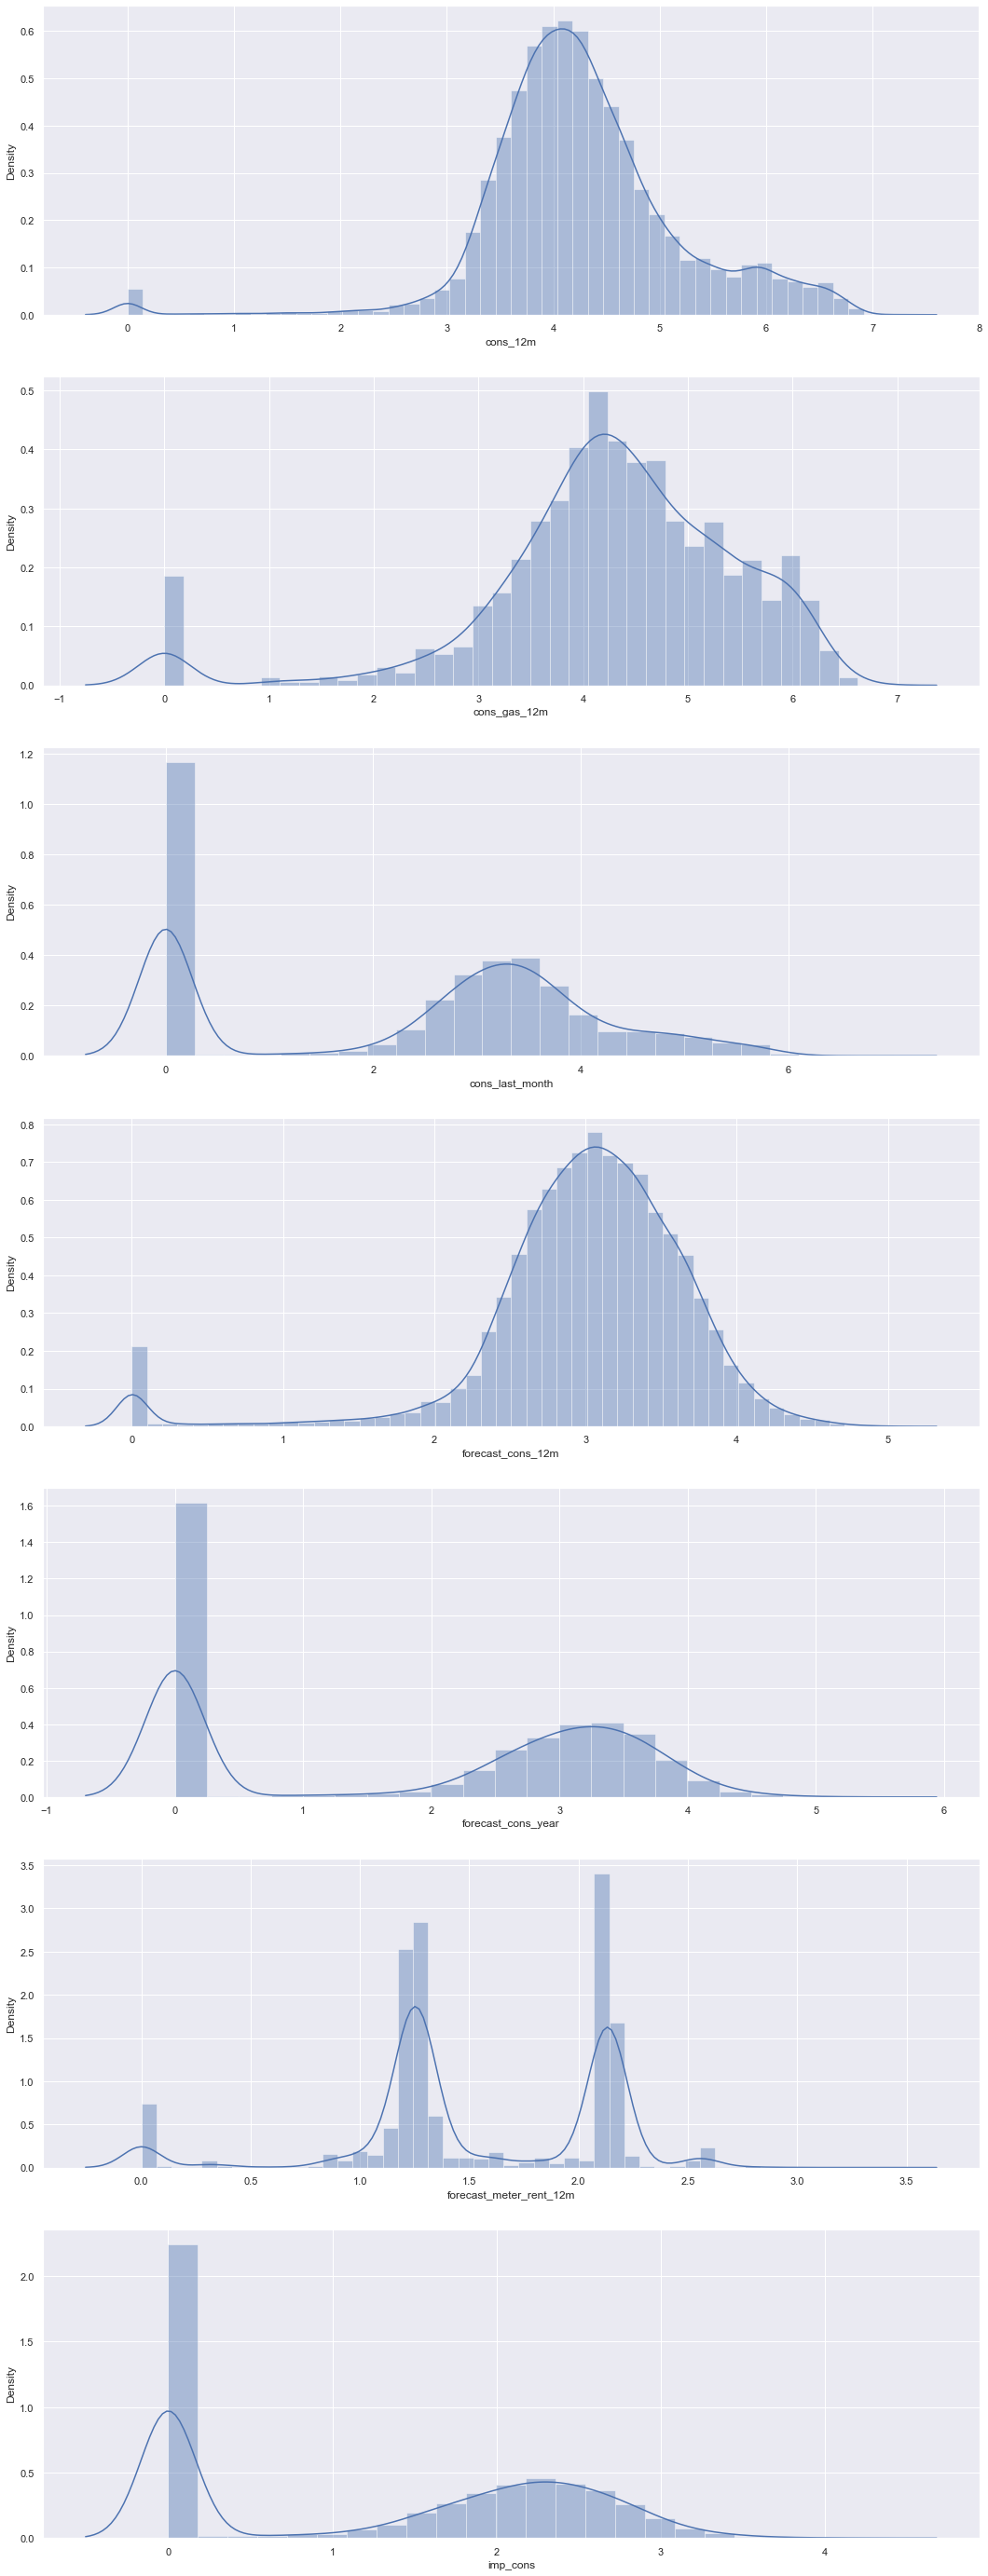

In [81]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.distplot((train["cons_12m"].dropna()), ax=axs[0])
sns.distplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packa

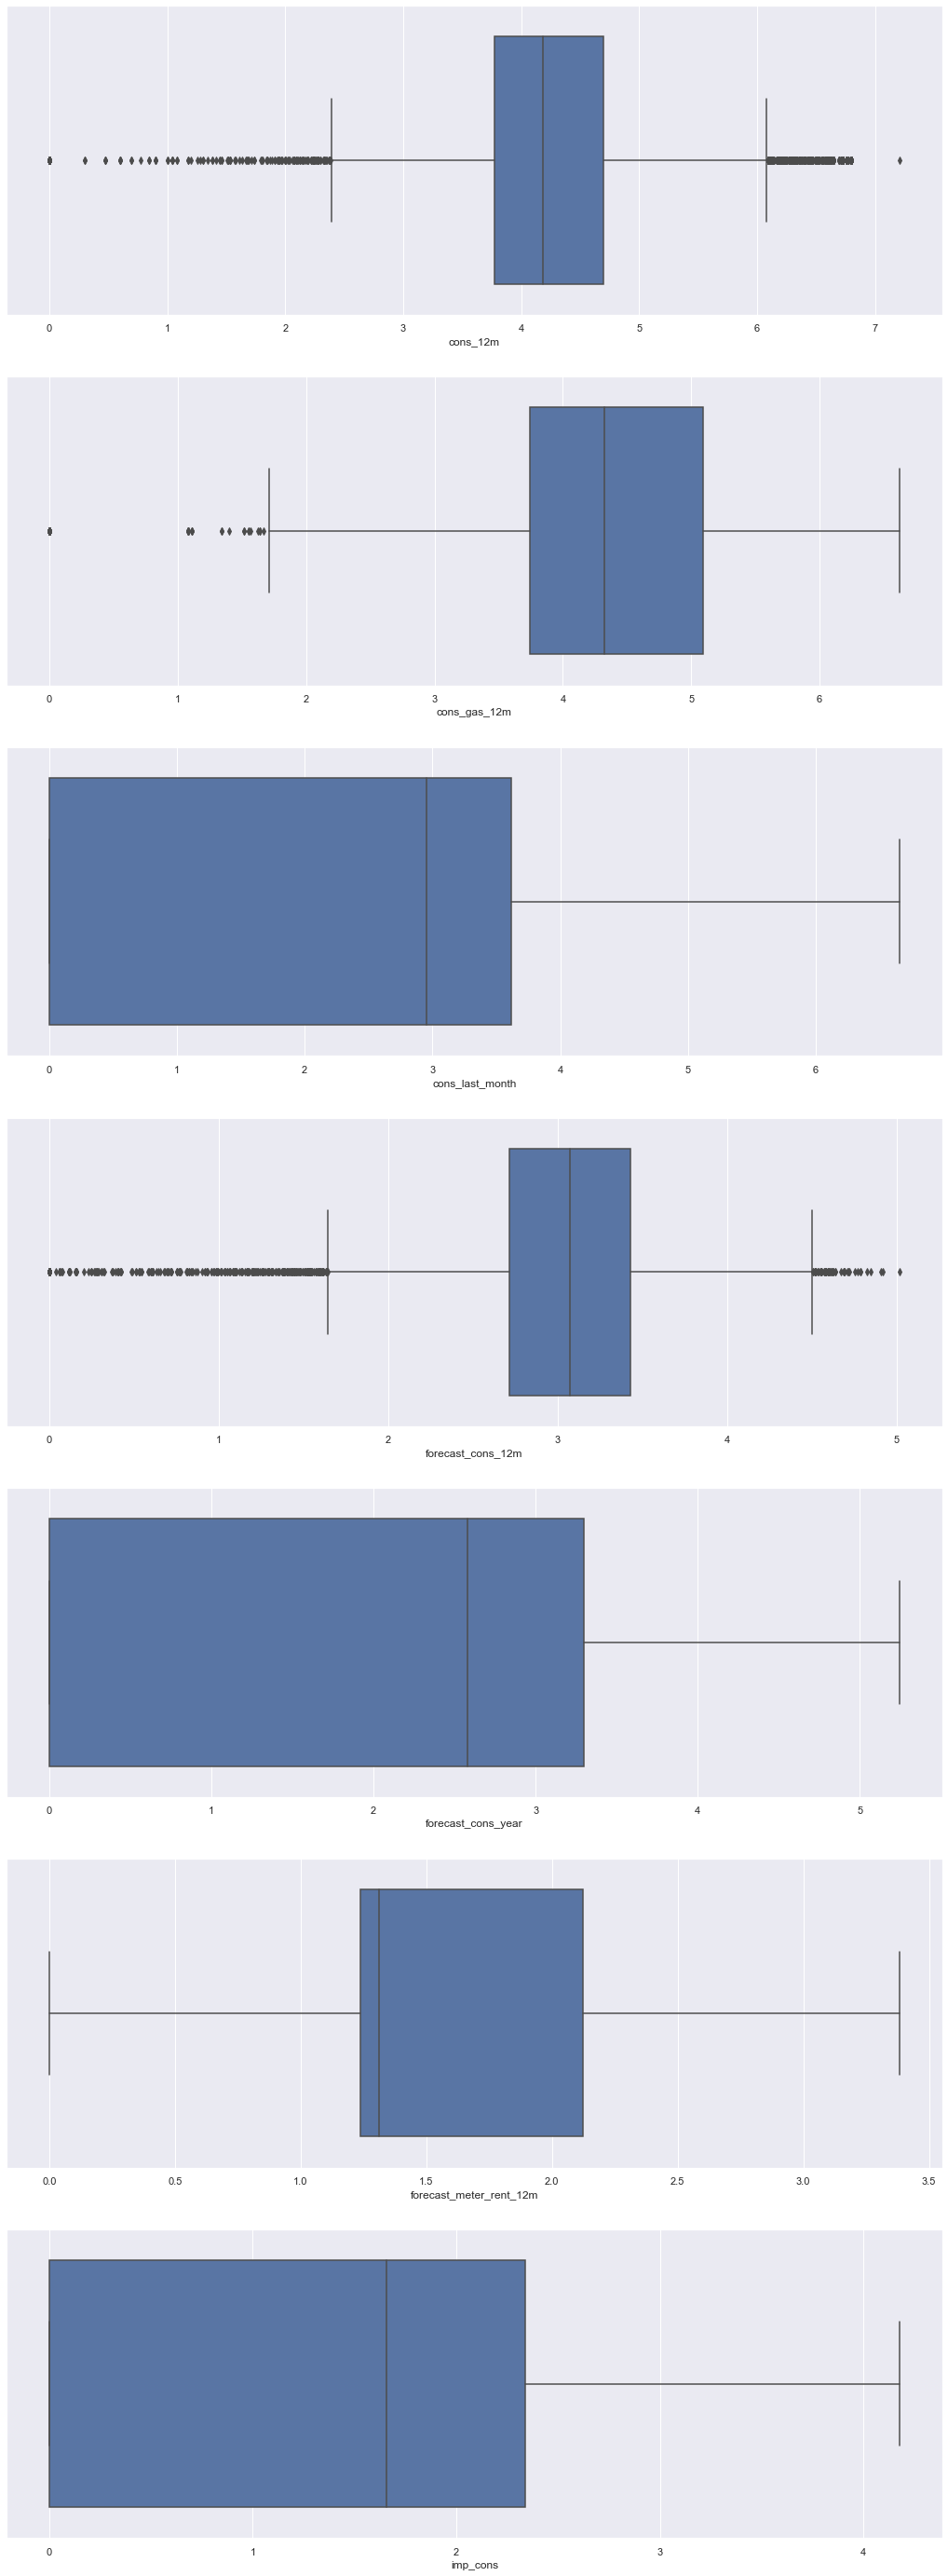

In [82]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

### Correlation Detection & removal

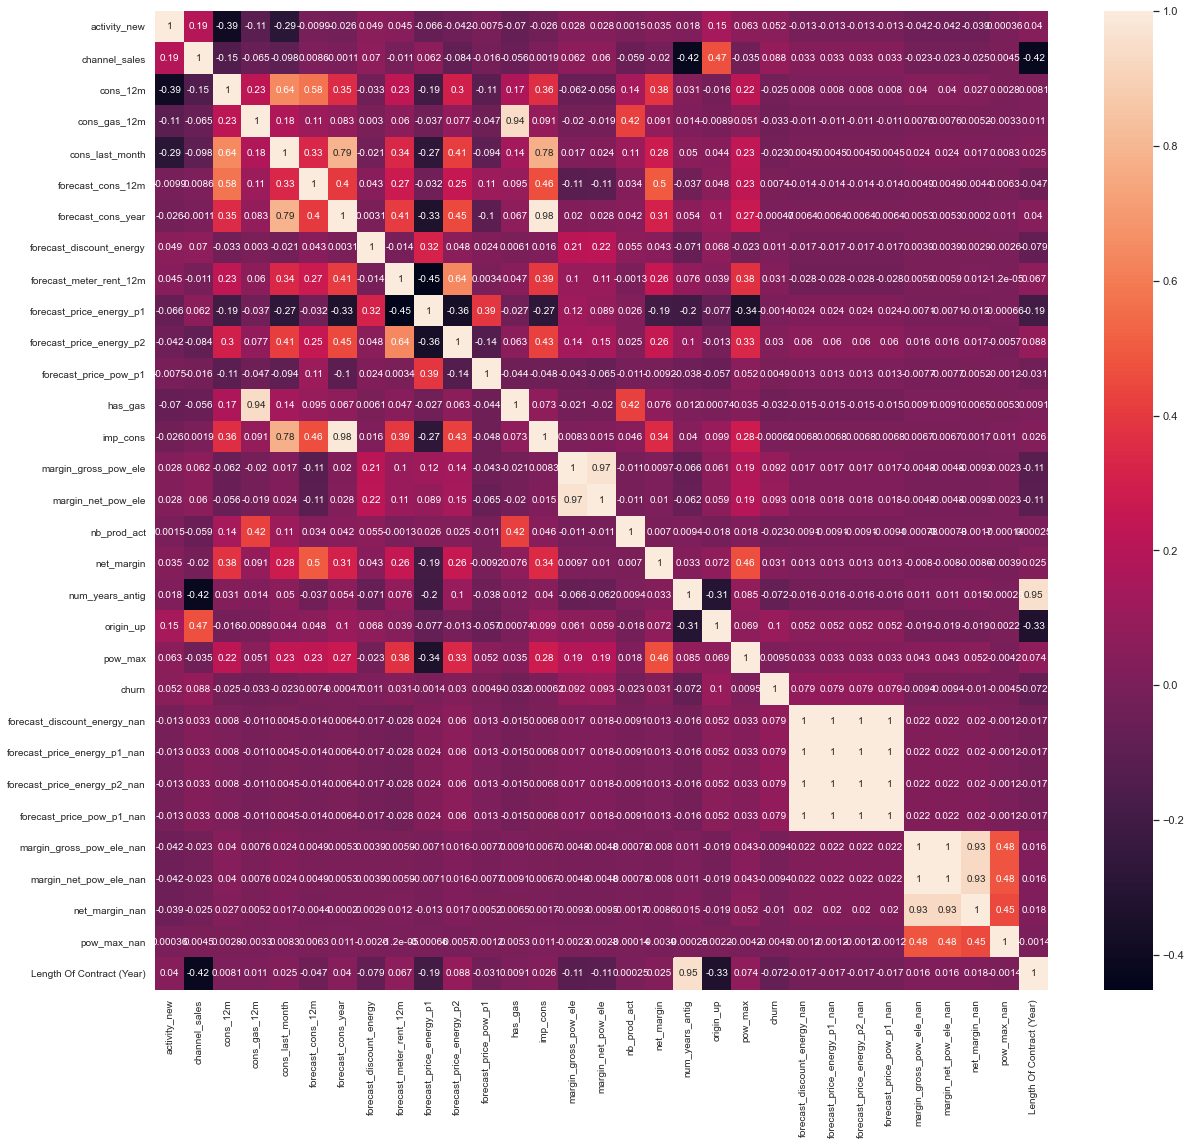

In [83]:
correlation = train.corr()
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values,
           annot=True, annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [84]:
train.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

#### Outlier Detection and removal  
We will replace outliers with the mean.

In [85]:
def replace_outliers_z_score(dataframe,column,z=3):
    from scipy.stats import zscore
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])
    
    df["zscore"]=zscore(df[column])
    mean_=df[(df["zscore"]>-z)&(df["zscore"]<z)][column].mean()
    
    dataframe[column]=dataframe[column].fillna(mean_)
    dataframe["zscore"]=zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"]<-z) | (dataframe["zscore"]>z)].shape[0]
    dataframe.loc[(dataframe["zscore"]<-z) | (dataframe["zscore"]>z), column] = mean_
    
    print("Replaced: ", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")
    
        

In [86]:
for c in features.columns:
    if c != "id":
        features = replace_outliers_z_score(features, c)

Replaced:  276  outliers in  mean_year_price_p1_var
Replaced:  0  outliers in  mean_year_price_p2_var
Replaced:  0  outliers in  mean_year_price_p3_var
Replaced:  120  outliers in  mean_year_price_p1_fix
Replaced:  0  outliers in  mean_year_price_p2_fix
Replaced:  0  outliers in  mean_year_price_p3_fix
Replaced:  122  outliers in  mean_year_price_p1
Replaced:  0  outliers in  mean_year_price_p2
Replaced:  0  outliers in  mean_year_price_p3


In [87]:
features.reset_index(drop=True, inplace=True)

In [88]:
train = replace_outliers_z_score(train,"cons_12m")
train = replace_outliers_z_score(train,"cons_gas_12m")
train = replace_outliers_z_score(train,"cons_last_month")
train = replace_outliers_z_score(train,"forecast_cons_12m")
#train = replace_outliers_z_score(train,"forecast_cons_year")
train = replace_outliers_z_score(train,"forecast_discount_energy")
train = replace_outliers_z_score(train,"forecast_meter_rent_12m")
train = replace_outliers_z_score(train,"forecast_price_energy_p1")
train = replace_outliers_z_score(train,"forecast_price_energy_p2")
train = replace_outliers_z_score(train,"forecast_price_pow_p1")
train = replace_outliers_z_score(train,"imp_cons")
train = replace_outliers_z_score(train,"margin_gross_pow_ele")
train = replace_outliers_z_score(train,"margin_net_pow_ele")
train = replace_outliers_z_score(train,"net_margin")
train = replace_outliers_z_score(train,"pow_max")

Replaced:  174  outliers in  cons_12m
Replaced:  118  outliers in  cons_gas_12m
Replaced:  0  outliers in  cons_last_month
Replaced:  425  outliers in  forecast_cons_12m
Replaced:  575  outliers in  forecast_discount_energy
Replaced:  1  outliers in  forecast_meter_rent_12m
Replaced:  300  outliers in  forecast_price_energy_p1
Replaced:  0  outliers in  forecast_price_energy_p2
Replaced:  239  outliers in  forecast_price_pow_p1
Replaced:  0  outliers in  imp_cons
Replaced:  263  outliers in  margin_gross_pow_ele
Replaced:  250  outliers in  margin_net_pow_ele
Replaced:  182  outliers in  net_margin
Replaced:  293  outliers in  pow_max


In [89]:
train.reset_index(drop=True, inplace=True)

C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packa

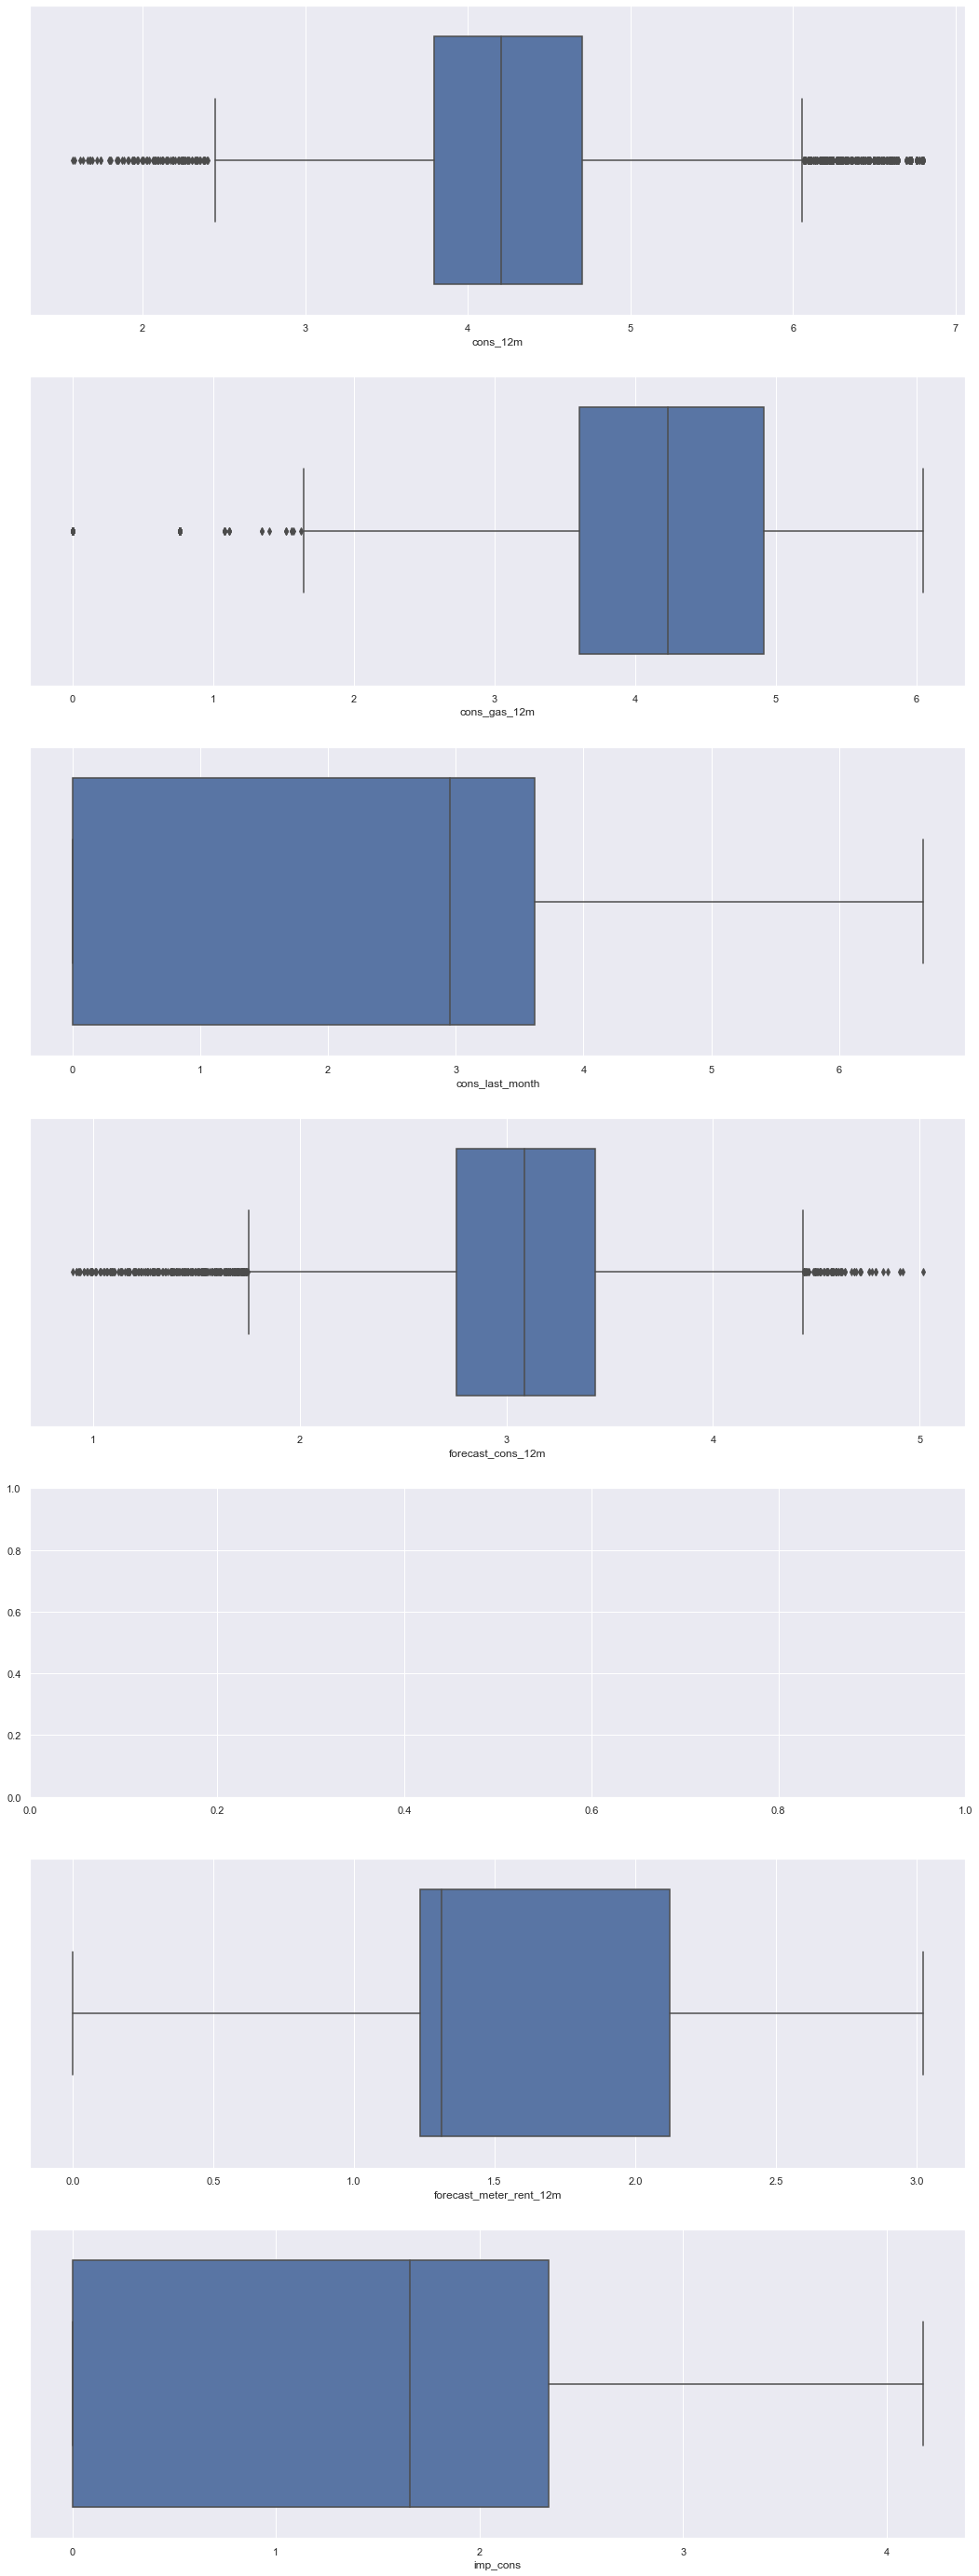

In [91]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

We can also use Robust Scaling method to remove the outliers

### Splitting Dataset

In [94]:
from sklearn.model_selection import train_test_split
X = train.drop("churn", axis=1)
y = train["churn"]
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### Feature scaling

In [95]:
scaling_features = [feature for feature in X.columns if feature not in ["id"]]

In [96]:
print(len(scaling_features))
scaling_features

28


['activity_new',
 'channel_sales',
 'cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_p1',
 'forecast_price_energy_p2',
 'forecast_price_pow_p1',
 'has_gas',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'origin_up',
 'pow_max',
 'forecast_discount_energy_nan',
 'forecast_price_energy_p1_nan',
 'forecast_price_energy_p2_nan',
 'forecast_price_pow_p1_nan',
 'margin_gross_pow_ele_nan',
 'margin_net_pow_ele_nan',
 'net_margin_nan',
 'pow_max_nan',
 'Length Of Contract (Year)']

In [97]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [98]:
robust_scaler = RobustScaler()
scaled_X = robust_scaler.fit_transform(X[scaling_features])

In [99]:
data = pd.concat([train[["id", "churn"]].reset_index(drop=True), 
                 pd.DataFrame(scaled_X,columns = scaling_features)], axis=1)

In [100]:
data.head()

,id,churn,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,origin_up,pow_max,forecast_discount_energy_nan,forecast_price_energy_p1_nan,forecast_price_energy_p2_nan,forecast_price_pow_p1_nan,margin_gross_pow_ele_nan,margin_net_pow_ele_nan,net_margin_nan,pow_max_nan,Length Of Contract (Year)
0,48ada52261e7cf58715202705a0451c9,0,1.0,-1.000000,1.413248,0.000000,0.289269,1.991987,0.0,1.406780,-1.530329,0.022097,3.963793,0.0,0.539450,0.000000,0.000000,0.0,0.378568,0.0,0.622746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333
1,24011ae4ebbe3035111d65fa7c15bc57,1,0.0,0.333333,0.132764,4.739944,-0.817317,0.000000,0.0,-0.978104,-0.924658,0.121200,-1.000000,1.0,-0.708312,0.313853,0.322511,1.0,2.658602,0.5,4.081096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.666667
2,d29c2c54acc38ff3c0614d0a653813dd,0,0.0,-0.666667,-0.591831,0.000000,-0.817317,-1.198750,0.0,-0.082621,0.094365,-0.871769,0.000000,0.0,-0.708312,-0.339827,-0.331169,0.0,-0.479091,-0.5,-0.007671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667
3,764c75f661154dac3a6c254cd082ea7d,0,0.0,0.333333,-1.617646,0.000000,-0.817317,-2.078946,0.0,0.325714,0.749666,0.017564,0.000000,0.0,-0.708312,0.541847,0.550505,0.0,-0.537510,-0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
4,bba03439a292a1e166f80264c16191cb,0,0.0,-1.000000,-1.107389,0.000000,-0.817317,-1.048095,0.0,0.009266,0.126440,-0.871769,0.000000,0.0,-0.708312,0.658730,0.667388,0.0,-0.447862,-0.5,-0.089863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333


In [103]:
history_feature_scale = [e for e in history_data.columns if e not in ["id", "price_date"]]
robust_scaler_history = RobustScaler()
scaled_history_data = robust_scaler_history.fit_transform(history_data[history_feature_scale])

In [104]:
history_data_scaled = pd.concat([history_data[["id", "price_date"]].reset_index(drop=True), 
                 pd.DataFrame(scaled_history_data, columns = history_feature_scale)], axis=1)
history_data_scaled

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.207880,-0.840764,0.00000,3.229431e-07,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.207880,-0.840764,0.00000,3.229431e-07,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.207880,-0.840764,0.00000,3.229431e-07,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.140029,-0.840764,0.00000,3.229431e-07,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.140029,-0.840764,0.00000,3.229431e-07,0.000000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,-1.017849,0.164734,1.05098,-9.521560e-01,1.004016,1.004016
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,-1.017849,0.164734,1.05098,-9.521560e-01,1.004016,1.004016
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,-1.017849,0.164734,1.05098,-9.521560e-01,1.004016,1.004016
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,-1.017849,0.164734,1.05098,-9.521560e-01,1.004016,1.004016


In [105]:
history_data_scaled.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.207880,-0.840764,0.0,3.229431e-07,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.207880,-0.840764,0.0,3.229431e-07,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.207880,-0.840764,0.0,3.229431e-07,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.140029,-0.840764,0.0,3.229431e-07,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.140029,-0.840764,0.0,3.229431e-07,0.0,0.0


We can again transform this data using StandardScaler or MinMaxScaler, as Standardization of a dataset is a common requirement for many machine learning estimators

In [106]:
data.to_csv("train_data_scaled.csv", index=False)
history_data_scaled.to_csv("history_data_scaled.csv", index=False)